# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import requests
import datetime
import time
import random
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

from api_keys import weather_api_key
from pprint import pprint


## Generate Cities List

In [2]:
from citipy import citipy
cities = []
while len(cities) < 643:
    x = (random.choice(range(-90,90)))
    y = (random.choice(range(-180,180)))
    city = citipy.nearest_city(x,y).city_name
    if city not in cities:
        cities.append(city)
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
weather_url = f"{url}&appid={weather_api_key}&units={unit}&q="


In [4]:
# Lists for results
city_name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country = []

count = 0
set = 1

print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    try:
        response = requests.get(weather_url + city).json()
        city_name.append(city)
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        if count > 48:
            count = 1
            set += 1
        else:
            count += 1
        print("Processing Record %s of Set %s | %s" %(count, set, city))
    except:
        print("City not found: Skipping...")
        city_name.pop()
        pass
        
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | leningradskiy
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | mugur-aksy
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | sao filipe
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | praya
Processing Record 11 of Set 1 | ponta do sol
City not found: Skipping...
Processing Record 12 of Set 1 | malm
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | balakovo
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | gewane
Processing Record 18 of Set 1 | abu dhabi
Processing Record 19 of Set 1 | sun valley
Processing Record 20 of Set 1 | saint-francois
Processing Record 21 of Set 1 | zhangye
Processing Record 22 of Set 1 | bluff
Process

Processing Record 43 of Set 4 | faya
Processing Record 44 of Set 4 | paragominas
Processing Record 45 of Set 4 | campbell river
City not found: Skipping...
Processing Record 46 of Set 4 | goure
Processing Record 47 of Set 4 | poum
Processing Record 48 of Set 4 | dunedin
Processing Record 49 of Set 4 | miramar
Processing Record 1 of Set 5 | bud
Processing Record 2 of Set 5 | nador
City not found: Skipping...
Processing Record 3 of Set 5 | tzaneen
City not found: Skipping...
Processing Record 4 of Set 5 | vodnyy
Processing Record 5 of Set 5 | ahipara
Processing Record 6 of Set 5 | primorsko-akhtarsk
Processing Record 7 of Set 5 | bowen
Processing Record 8 of Set 5 | tazovskiy
Processing Record 9 of Set 5 | mackay
Processing Record 10 of Set 5 | atar
Processing Record 11 of Set 5 | linhai
Processing Record 12 of Set 5 | taoudenni
Processing Record 13 of Set 5 | beaupre
Processing Record 14 of Set 5 | alamos
Processing Record 15 of Set 5 | kudahuvadhoo
Processing Record 16 of Set 5 | eurek

Processing Record 38 of Set 8 | bonthe
Processing Record 39 of Set 8 | brigantine
Processing Record 40 of Set 8 | dalvik
Processing Record 41 of Set 8 | benjamin constant
Processing Record 42 of Set 8 | haines junction
Processing Record 43 of Set 8 | usinsk
City not found: Skipping...
Processing Record 44 of Set 8 | berlevag
Processing Record 45 of Set 8 | anshun
Processing Record 46 of Set 8 | linxia
Processing Record 47 of Set 8 | manado
Processing Record 48 of Set 8 | vernon
Processing Record 49 of Set 8 | vasilyevskiy mokh
Processing Record 1 of Set 9 | alekseyevka
Processing Record 2 of Set 9 | maningrida
Processing Record 3 of Set 9 | muros
Processing Record 4 of Set 9 | zhigansk
Processing Record 5 of Set 9 | kosjeric
Processing Record 6 of Set 9 | kraslava
Processing Record 7 of Set 9 | laguna
Processing Record 8 of Set 9 | ust-maya
Processing Record 9 of Set 9 | awbari
Processing Record 10 of Set 9 | san felipe
Processing Record 11 of Set 9 | kutum
Processing Record 12 of Set 

City not found: Skipping...
Processing Record 27 of Set 12 | oistins
Processing Record 28 of Set 12 | tadine
Processing Record 29 of Set 12 | shepetivka
City not found: Skipping...
Processing Record 30 of Set 12 | dzhebariki-khaya
Processing Record 31 of Set 12 | deputatskiy
City not found: Skipping...
Processing Record 32 of Set 12 | mamaku
Processing Record 33 of Set 12 | buchanan
Processing Record 34 of Set 12 | laizhou
Processing Record 35 of Set 12 | arman
Processing Record 36 of Set 12 | tallahassee
Processing Record 37 of Set 12 | halifax
Processing Record 38 of Set 12 | shahrud
Processing Record 39 of Set 12 | adre
Processing Record 40 of Set 12 | lufilufi
Processing Record 41 of Set 12 | mandalgovi
Processing Record 42 of Set 12 | astoria
Processing Record 43 of Set 12 | porangatu
Processing Record 44 of Set 12 | kamenka
Processing Record 45 of Set 12 | airai
Processing Record 46 of Set 12 | shaunavon
Processing Record 47 of Set 12 | berlin
Processing Record 48 of Set 12 | nec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather = {"City": city_name,
                "Latitude": lat,
                "Longitude" : lon,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
               "Date" : date}


In [6]:
city_df = pd.DataFrame(city_weather)
city_df.to_csv("WeatherData.csv",encoding="utf-8",index=False)
city_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,42.91,93,75,2.30,CL,1655106641
1,leningradskiy,69.3833,178.4167,33.84,87,96,11.10,RU,1655106641
2,atuona,-9.8000,-139.0333,77.90,64,76,20.78,PF,1655106642
3,mugur-aksy,50.3500,90.5000,73.60,30,96,3.22,RU,1655106642
4,upernavik,72.7868,-56.1549,28.53,96,100,5.48,GL,1655106642


In [7]:
city_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,5.930000e+02
mean,20.412516,19.529636,69.462782,65.394604,55.897133,8.451703,1.655107e+09
std,33.045874,89.307222,16.186836,24.128655,39.767328,5.832888,7.339677e+01
min,-54.800000,-175.200000,22.950000,1.000000,0.000000,0.000000,1.655106e+09
25%,-7.950000,-59.430700,59.610000,47.000000,14.000000,4.090000,1.655107e+09
50%,25.519800,24.666700,71.370000,71.000000,67.000000,6.910000,1.655107e+09
75%,48.005600,97.200000,79.740000,86.000000,99.000000,12.010000,1.655107e+09
max,78.218600,179.316700,114.370000,100.000000,100.000000,33.600000,1.655107e+09


In [8]:
city_df.count()

City          593
Latitude      593
Longitude     593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100 = city_df[(city_df["Humidity"] > 100)]
humidity_over_100


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
humidity_over_100.index

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = pd.concat([city_df,humidity_over_100], axis=0,ignore_index=True).drop_duplicates(keep=False,ignore_index=True)
clean_city_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,42.91,93,75,2.30,CL,1655106641
1,leningradskiy,69.3833,178.4167,33.84,87,96,11.10,RU,1655106641
2,atuona,-9.8000,-139.0333,77.90,64,76,20.78,PF,1655106642
3,mugur-aksy,50.3500,90.5000,73.60,30,96,3.22,RU,1655106642
4,upernavik,72.7868,-56.1549,28.53,96,100,5.48,GL,1655106642
...,...,...,...,...,...,...,...,...,...
588,kavalerovo,44.2661,135.0572,65.44,52,98,7.36,RU,1655106823
589,copiapo,-27.3667,-70.3333,46.09,52,1,0.07,CL,1655106824
590,bozuyuk,39.9078,30.0367,66.78,69,76,11.32,TR,1655106698
591,surat,21.1667,72.8333,89.58,58,40,10.36,IN,1655106690


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

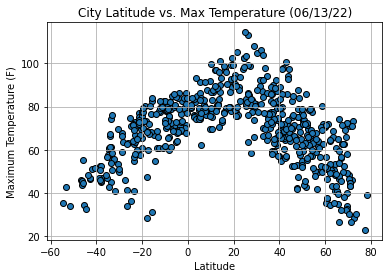

In [12]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Max Temp"],edgecolor="black",marker="o", label ="Cities")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.grid(True)
plt.savefig("Images/Temperature.png")

The Latitude vs Temperature plot shown above includes data from all the cities attains its maximum around 20-degress latitude. The latitude values below and above that latitude shows a linear relationship too. 

## Latitude vs. Humidity Plot

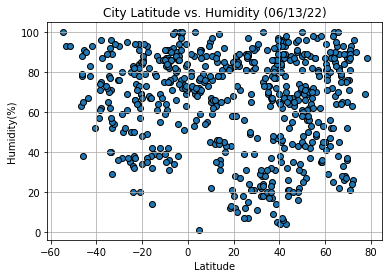

In [13]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Humidity"],edgecolor="black",marker="o", label ="Cities")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)
plt.savefig("Images/Humidity.jpg")

The Latitude Vs. Humidity plot shows that that the distribution of data points are relatively spread out. There is more clustering as the Humidity % crosses 40.

## Latitude vs. Cloudiness Plot

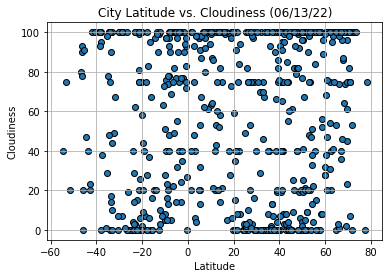

In [14]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Cloudiness"],edgecolor="black",marker="o", label ="Cities")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("Images/Cloudiness.jpg")

The Latitude Vs. Cloudiness plot doesn't seem to show a relationship between the Latitude and Cloudiness. There is a lot of clusters in 0 and between 90 to 100. It is possible that these may be categorised from some sources but doesn't suggest continuous measurement.

## Latitude vs. Wind Speed Plot

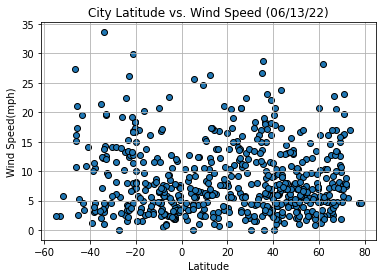

In [15]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Wind Speed"],edgecolor="black",marker="o", label ="Cities")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(True)
plt.savefig("Images/Wind_Speed.jpg")

The Latitude Vs Wind Speed Plot doesn't show any relation between the latitude and wind speed but we can conlude that majority of the values and below 15mph.

## Linear Regression

In [16]:
def linear_regression(x_value,y_value,locx,locy,y_label):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
    
    regress = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value,regress,"r-")
    plt.annotate(line_eq,(locx,locy), fontsize =12, color ="red")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_label}")
    plt.grid()
    print(f"The r-value is:{rvalue}")
    

In [17]:
northern_df = clean_city_data.loc[clean_city_data["Latitude"] > 0]
southern_df = clean_city_data.loc[clean_city_data["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:-0.6866014435632206


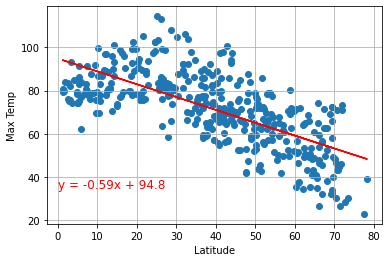

In [18]:
x_value = northern_df["Latitude"]
y_value = northern_df["Max Temp"]

locx = 0
locy = 35

y_label = "Max Temp"
linear_regression(x_value,y_value,locx,locy,y_label)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:0.7295153262960588


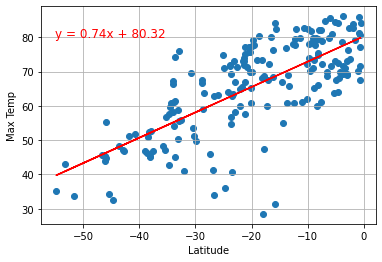

In [19]:
x_value = southern_df["Latitude"]
y_value = southern_df["Max Temp"]

locx = -55
locy = 80

y_label = "Max Temp"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:0.020593413750843274


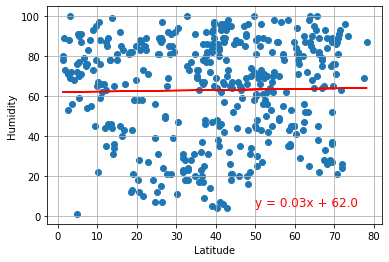

In [20]:
x_value = northern_df["Latitude"]
y_value = northern_df["Humidity"]

locx = 50
locy = 5

y_label = "Humidity"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:0.06481095144848914


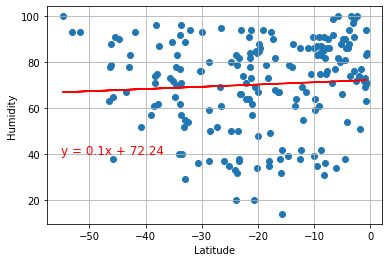

In [21]:
x_value = southern_df["Latitude"]
y_value = southern_df["Humidity"]

locx = -55
locy = 40

y_label = "Humidity"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:0.027893427333655726


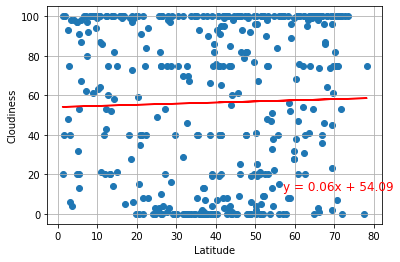

In [32]:
x_value = northern_df["Latitude"]
y_value = northern_df["Cloudiness"]

locx = 57
locy = 12

y_label = "Cloudiness"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:0.06846038519335074


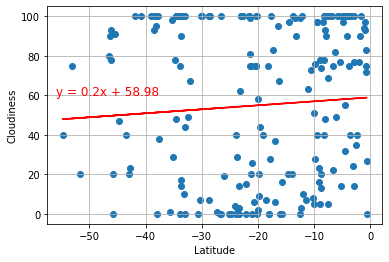

In [33]:
x_value = southern_df["Latitude"]
y_value = southern_df["Cloudiness"]

locx = -56
locy = 60

y_label = "Cloudiness"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:-0.009069784808496878


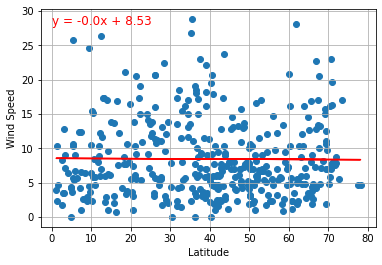

In [24]:
x_value = northern_df["Latitude"]
y_value = northern_df["Wind Speed"]

locx = 0
locy = 28

y_label = "Wind Speed"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:-0.23168551366662413


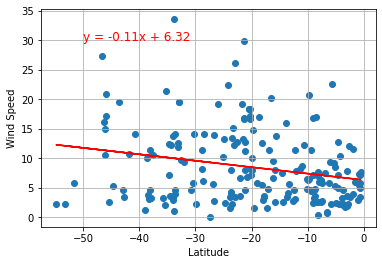

In [25]:
x_value = southern_df["Latitude"]
y_value = southern_df["Wind Speed"]

locx = -50
locy = 30

y_label = "Wind Speed"
linear_regression(x_value,y_value,locx,locy,y_label)